# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [1]:
# Q1 (code)
! pip install tomotopy

In [2]:
! pip install little-mallet-wrapper

  Obtaining dependency information for little-mallet-wrapper from https://files.pythonhosted.org/packages/e3/01/7e8561e33e79b408d9526b22b50e20bfdd8e551979237ad5c972759fe7d8/little_mallet_wrapper-0.5.0-py3-none-any.whl.metadata
  Using cached little_mallet_wrapper-0.5.0-py3-none-any.whl.metadata (13 kB)
Using cached little_mallet_wrapper-0.5.0-py3-none-any.whl (19 kB)


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [7]:
# Q2 (code)
import pandas as pd
trump_data = pd.read_csv('trump_tweets.csv')
sanders_data = pd.read_csv('sanders_tweets.csv')

frames = [trump_data, sanders_data]
all_tweets = pd.concat(frames)

all_tweets.head()

,Username,TweetId,Title,Content
0,@realDonaldTrump,822421390125043713,@realDonaldTrump_822421390125043713,It all begins today! I will see you at 11:00 ...
1,@realDonaldTrump,822501803615014918,@realDonaldTrump_822501803615014918,Today we are not merely transferring power fr...
2,@realDonaldTrump,822501939267141634,@realDonaldTrump_822501939267141634,"power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,822502135233384448,@realDonaldTrump_822502135233384448,What truly matters is not which party control...
4,@realDonaldTrump,822502270503972872,@realDonaldTrump_822502270503972872,"January 20th 2017, will be remembered as the ..."


import seaborn
import glob
from pathlib import Path
import pandas as pd### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [8]:
import pandas as pd
import seaborn
import numpy
import tomotopy as tp
import little_mallet_wrapper

In [94]:
# Q3 (code)
training_data = []
original_texts = []
titles = []

for index, row in all_tweets.iterrows():
    text = row['Content']
    author = row['Username']
    tweet_id = row['TweetId']
    processed_text = little_mallet_wrapper.process_string(text)
    
    # training data list
    training_data.append(processed_text)
    
    # Original texts list
    original_texts.append(text)
    
    # Titles list
    titles.append(f"{author}_{tweet_id}")

# Example output
print(training_data[:5])
print(original_texts[:5])
print(titles[:5])


['begins today see NUM NUM swearing movement continues work begins', 'today merely transferring power one administration another one party another transferring', 'power washington giving back american people inaugurationday', 'truly matters party controls government whether government controlled people', 'january NUMth NUM remembered day people became rulers nation']
[' It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!', ' Today we are not merely transferring power from one Administration to another, or from one party to another‚ Äì but we are transferring...', ' power from Washington, D.C. and giving it back to you, the American People. # InaugurationDay', ' What truly matters is not which party controls our government, but whether our government is controlled by the people.', ' January 20th 2017, will be remembered as the day the people became the rulers of this nation again.']
['@realDonaldTrump_822421390125043713', '@re

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [104]:
# Q4 (code)
num_topics = 15
num_topic_words = 7

model = tp.LDAModel(k=num_topics)

for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.33071803647092
Iteration: 10	Log-likelihood: -8.95653600963783
Iteration: 20	Log-likelihood: -8.76729051672881
Iteration: 30	Log-likelihood: -8.656674256759256
Iteration: 40	Log-likelihood: -8.590363832538227
Iteration: 50	Log-likelihood: -8.541486969560513
Iteration: 60	Log-likelihood: -8.51061883802411
Iteration: 70	Log-likelihood: -8.47855209115959
Iteration: 80	Log-likelihood: -8.460441033064487
Iteration: 90	Log-likelihood: -8.442703882699718


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [55]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

//t https great women today national nation

✨Topic 1✨

NUM health care tax people //t https

✨Topic 2✨

https //t realdonaldtrump america american president great

✨Topic 3✨

great vote state total endorsement military strong

✨Topic 4✨

border wall must democrats country want security

✨Topic 5✨

news fake media people biden never would

✨Topic 6✨

https //t federal coronavirus government help local

✨Topic 7✨

NUM senate vote court //t election democrats

✨Topic 8✨

//t https thank trump NUM see tonight

✨Topic 9✨

people must //t https trump war change

✨Topic 10✨

NUM years president great economy ever trump

✨Topic 11✨

https //t realdonaldtrump president trump biden thank

✨Topic 12✨

china great trade many big states deal

✨Topic 13✨

https //t NUM great white president today

✨Topic 14✨

trump fbi president russia collusion witch hunt



# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

There is still a lot of rt present, which could be removed manually. The results of the topics are interesting because they refer to international politics, also to national politics as well as more issues linked election and climate. In the topics concerning more international issues we can find keywords such as China, Russia. The topics linked to national politics concern wadges and taxes, health care, security, military issues, borders etc. Some topics also directly refer to the elections or trumps ordeal with the supreme court, impeachment etc. A lot of these topics seems to be linked to Trumps viewpoints since they refere to controversial topics. 

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [56]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5324158685902753 
Per Topic: [0.4744487315416336, 0.587990765273571, 0.4766629546880722, 0.7513562560081481, 0.506003800034523, 0.5880575537681579, 0.47882541418075564, 0.48831138759851456, 0.4041598685085773, 0.5092188030481338, 0.5087990671396255, 0.45304207503795624, 0.5780603289604187, 0.476037360727787, 0.7052636623382569]



## <b> Second Try with more topics and words<b>

In [38]:
"""
# Q4 (code)
num_topics = 20
num_topic_words = 5

model = tp.LDAModel(k=num_topics)

for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.443486602262373
Iteration: 10	Log-likelihood: -8.96769263208268
Iteration: 20	Log-likelihood: -8.772698678816292
Iteration: 30	Log-likelihood: -8.67240842639272
Iteration: 40	Log-likelihood: -8.609964270513006
Iteration: 50	Log-likelihood: -8.565771862466722
Iteration: 60	Log-likelihood: -8.525403803921145
Iteration: 70	Log-likelihood: -8.496156292019675
Iteration: 80	Log-likelihood: -8.474075186948284
Iteration: 90	Log-likelihood: -8.457117203198406


In [39]:
"""
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

tax NUM //t https trump

✨Topic 1✨

https //t change climate must

✨Topic 2✨

trump fbi NUM campaign obama

✨Topic 3✨

must //t https people war

✨Topic 4✨

great //t https today thank

✨Topic 5✨

great vote endorsement total strong

✨Topic 6✨

news fake media never witch

✨Topic 7✨

//t https realdonaldtrump president trump

✨Topic 8✨

https //t thank realdonaldtrump president

✨Topic 9✨

NUM jobs years economy year

✨Topic 10✨

biden america joe american country

✨Topic 11✨

democrats president nothing would never

✨Topic 12✨

president korea north meeting national

✨Topic 13✨

https //t president impeachment house

✨Topic 14✨

//t https whitehouse minister prime

✨Topic 15✨

border wall democrats great want

✨Topic 16✨

NUM health care https //t

✨Topic 17✨

states united china trade great

✨Topic 18✨

trump great like new book

✨Topic 19✨

NUM election vote house big



In [40]:
"""
# There are different metrics for coherence, we choose `c_v`
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.541458207394462 
Per Topic: [0.48513600155711173, 0.5062188550829887, 0.676766774430871, 0.4705919727683067, 0.5157410338521004, 0.7181676864624024, 0.6767322637140751, 0.4619576148688793, 0.49566034763120115, 0.6392076879739761, 0.4620996952056885, 0.5544039219617843, 0.5244796313345432, 0.5233011454343796, 0.57615175396204, 0.5155275732278823, 0.581555289030075, 0.5929883867502213, 0.38720526695251467, 0.4652712456882]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
- INITIAL 15 TOPICS / 7 words

The coherence scores for the 15 topics range from 0.409 to 0.767, showing how well words go together in each topic. Higher scores, around 0.7, mean words fit well together, showing clear topics. Lower scores, near 0.4, suggest words are less related, hinting at topics that are less focused.

- SECOND TRY 25 TOPICS / 5 words

The coherence scores for the 20 topics closely mirror those of the previous analysis, ranging from 0.39 to 0.72, showcasing the varying levels of semantic coherence within each topic.


### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

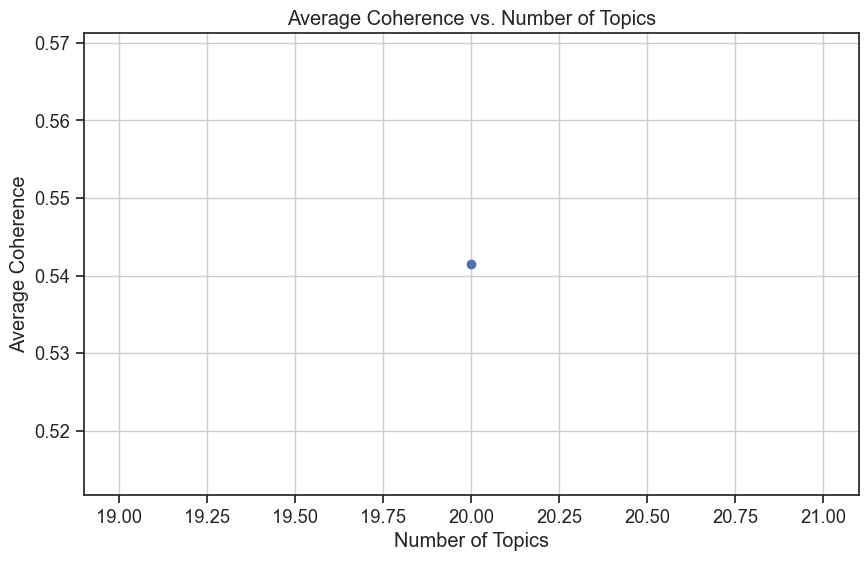

In [49]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
x = num_topics
y = average_coherence

import matplotlib.pyplot as plt

def plot_coherence(x_values, y_values):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.grid(True)
    plt.show()
plot_coherence(x, y)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [67]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

In [68]:
topic_distributions[15]

[0.0051561277,
 0.009270249,
 0.005820382,
 0.00439678,
 0.0067183604,
 0.43090627,
 0.004435142,
 0.0062573026,
 0.0052041616,
 0.008454328,
 0.42742318,
 0.006933412,
 0.008515697,
 0.06383022,
 0.0066784522]

In [69]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [71]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=2)

### ✨Topic 1✨

NUM health care tax people //t https



---


✨  
**Topic Probability**: 0.9653096199035645  
**Document**: Our obstacle to solving the climate crisis is not technological—it is political. We have what we need to rapidly move to a 100% renewable-energy economy. 

Now we must build a powerful political movement to make that happen. **https**://t.co/pTNVco5nCw



✨  
**Topic Probability**: 0.9645159244537354  
**Document**: Big banks are making record profits by charging sky-high interest rates &amp; fees. Unacceptable. If we're going to rebuild the middle class, we must significantly reduce consumer debt. I will be reintroducing my bill to end Wall Street greed &amp; cap credit card interest rates at 15%.



In [72]:
get_top_docs(original_texts, topic_distributions, topic_index=3, n=2)

### ✨Topic 3✨

great vote state total endorsement military strong



---


✨  
**Topic Probability**: 0.9500921964645386  
**Document**:  RT @realDonaldTrump: The Whistleblower gave false information &amp; dealt with corrupt politician Schiff. He must be brought forward to testify. Written answers not acceptable! Where is the 2nd Whistleblower? He disappeared after I released the transcript. Does he even exist? Where is the informant? Con!



✨  
**Topic Probability**: 0.9468415379524231  
**Document**:  The only people in favor of Mini Mike continuing with his hapless campaign are me and his political consultants, who are getting richer and richer by the day!



In [78]:
get_top_docs(original_texts, topic_distributions, topic_index=14, n=2)

### ✨Topic 14✨

trump fbi president russia collusion witch hunt



---


✨  
**Topic Probability**: 0.9497203826904297  
**Document**:  RT @WhiteHouse: New hoax. Same swamp. https://t.co/6byw3BVxFR



✨  
**Topic Probability**: 0.9354743361473083  
**Document**:  RT @realDonaldTrump: So, if there was knowingly &amp; acknowledged to be “zero” crime when the Special Counsel was appointed, and if the appointment was made based on the Fake Dossier (paid for by Crooked Hillary) and now disgraced Andrew McCabe (he &amp; all stated no crime), then the Special Counsel.......



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
- topic 1

This topic links healthcare, taxation, climate crisis, renewable energy, consumer debt reduction, and credit card interest rate caps, reflecting Bernie Sanders' policy priorities.

- topic 2

The documents linked to this topic feature President Trump's tweets about whistleblowers and endorsements, aligning with his emphasis on loyalty and military strength. Thius, this topic likely reflects Trump's viewpoints.

- topic 14

This topic is about President Trump, the FBI, Russia collusion, and the "witch hunt." The documents show Trump denying collusion and calling investigations fake. It reflects Trump's views on these matters.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [89]:
# Crete a sample of tweets

from random import sample
target_labels_ = sample(titles,100)

In [117]:
# Q8 (code)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': '})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()


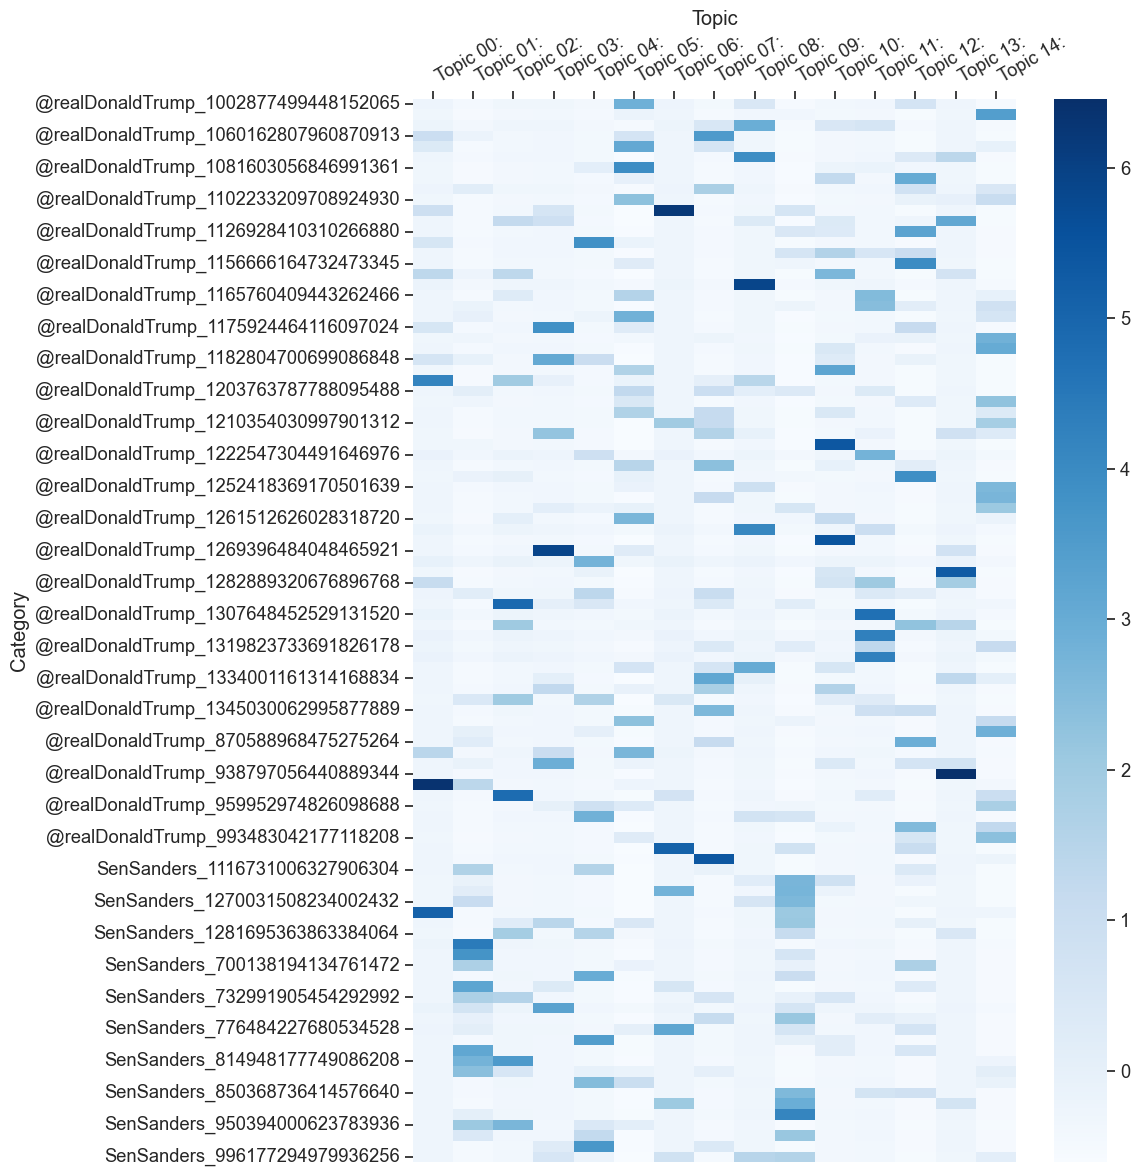

In [119]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  target_labels = target_labels,
                                  color_map = 'Blues',
                                 dim=(12,12))
# For all possible color maps, see https://matplotlib.org/stable/tutorials/colors/colormaps.html#miscellaneous

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

There is no clear pattern in this heat map but there are clearly topics that are a lot more likely for Donald Trum that for Sanders. The darkest squares are all situated within the Trump tweets sample, whereas Sanders tweets are all less likely. 
Topic 6, which concerns coronavirus, topic 3 on military endorsement are all very likely for Trump. 

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [126]:
# X2 (code)

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)